# Introduction

In this notebook, we analyse the oracles generated in **feat_br_orc_v2_gen** notebook:
 
 * Feat_BR_volunteers
 * Feat_BR_expert
 * Feat_BR_volunteers_expert_union
 * Feat_BR_volunteers_expert_intersec

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np

from sklearn.metrics import cohen_kappa_score

from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions

from matplotlib import pyplot as plt

In [2]:
feat_br_expert_volunteers_union_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df()
feat_br_expert_volunteers_intersec_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df()
feat_br_volunteers_oracle = fd.Feat_BR_Oracles.read_feat_br_volunteers_df()
feat_br_expert_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_df()
print()

br_2_feature_matrix_final = fd.Feat_BR_Oracles.read_br_2_features_matrix_final_df()
print()

bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

Expert and Volunteers Matrix UNION.shape: (93, 21)
Expert and Volunteers Matrix INTERSEC.shape: (93, 21)
Volunteers Matrix shape: (93, 21)
Expert Matrix shape: (93, 21)

BR_2_Features Matrix Final.shape: (93, 4)

SelectedBugReports.shape: (93, 18)
Features.shape: (21, 8)


# Cohen's Kappa - Features x Bug Reports Trace Matrix

The Cohen's Kappa Score measures the iter-rater agreement for qualitive answers (categorical items). It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.

In the section bellow, we calculate the Cohen's kappa with the expert answers and the volunteers answers.

In [3]:
expert_answers = []
volunteers_answers = []

for idx,row in feat_br_volunteers_oracle.iterrows():
    for col in feat_br_volunteers_oracle.columns:
        volunteers_answers.append(feat_br_volunteers_oracle.at[idx,col])
        expert_answers.append(feat_br_expert_oracle.at[idx,col])

print("Expert Answers Length: {}".format(len(expert_answers)))
print("Volunteers Answers Length: {}".format(len(volunteers_answers)))

print("Cohen Kappa Score: {}".format(cohen_kappa_score(expert_answers, volunteers_answers)))

Expert Answers Length: 1953
Volunteers Answers Length: 1953
Cohen Kappa Score: 0.46050047741726263


We can observe that we have a weak inter-rater agreement level, because the kappa is between 0.40 and 0.59, we have only 15-35% of the data reliable. [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900052/)

# Calculate Sparsity

In [4]:
print('feat_br_volunteers_oracle sparsity: {:>40.2%}'.format(aux_functions.calculate_sparsity(feat_br_volunteers_oracle)))
print('feat_br_expert_oracle sparsity: {:>44.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_oracle)))
print()
print('feat_br_expert_volunteers_oracle_union sparsity: {:>27.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_volunteers_union_oracle)))
print('feat_br_expert_volunteers_oracle_intersec sparsity: {:>24.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_volunteers_intersec_oracle)))

feat_br_volunteers_oracle sparsity:                                   94.16%
feat_br_expert_oracle sparsity:                                       96.72%

feat_br_expert_volunteers_oracle_union sparsity:                      93.09%
feat_br_expert_volunteers_oracle_intersec sparsity:                   97.80%


# Distribution Amount Features by BRs

[]

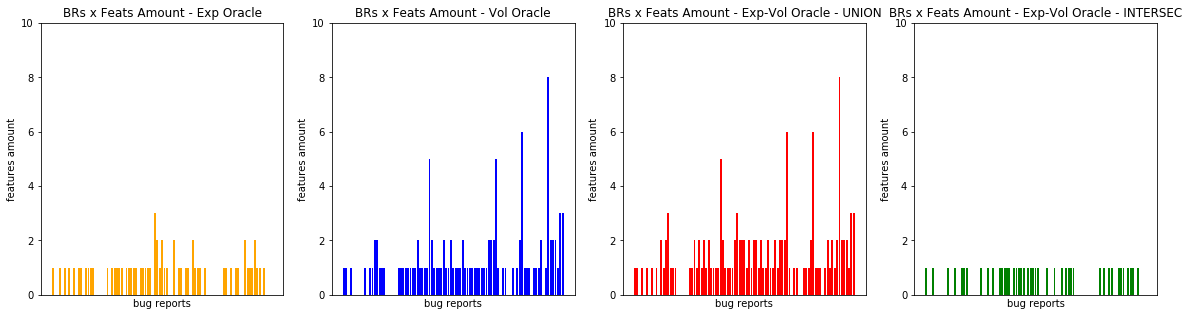

In [5]:
brs_expert = feat_br_expert_oracle.index
feats_amount_expert = feat_br_expert_oracle.apply(lambda row : sum(row.values), axis=1)

brs_vol = feat_br_volunteers_oracle.index
feats_amount_vol = feat_br_volunteers_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = feat_br_expert_volunteers_union_oracle.index
feats_amount_exp_vol_union = feat_br_expert_volunteers_union_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = feat_br_expert_volunteers_intersec_oracle.index
feats_amount_exp_vol_intersec = feat_br_expert_volunteers_intersec_oracle.apply(lambda row : sum(row.values), axis=1)

f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,5))

ax1.set_title('BRs x Feats Amount - Exp Oracle')
ax1.bar(x=np.arange(len(feat_br_expert_oracle)), height=feats_amount_expert, color='orange')
ax1.set(xlabel='bug reports', ylabel='features amount')
ax1.set_ylim([0, 10])
ax1.xaxis.set_ticks([])

ax2.set_title('BRs x Feats Amount - Vol Oracle')
ax2.bar(x=np.arange(len(feat_br_volunteers_oracle)), height=feats_amount_vol, color='blue')
ax2.set(xlabel='bug reports', ylabel='features amount')
ax2.set_ylim([0, 10])
ax2.xaxis.set_ticks([])

ax3.set_title('BRs x Feats Amount - Exp-Vol Oracle - UNION')
ax3.bar(x=np.arange(len(feat_br_expert_volunteers_union_oracle)), height=feats_amount_exp_vol_union, color='red')
ax3.set(xlabel='bug reports', ylabel='features amount')
ax3.set_ylim([0, 10])
ax3.xaxis.set_ticks([])

ax4.set_title('BRs x Feats Amount - Exp-Vol Oracle - INTERSEC')
ax4.bar(x=np.arange(len(feat_br_expert_volunteers_intersec_oracle)), height=feats_amount_exp_vol_intersec, color='green')
ax4.set(xlabel='bug reports', ylabel='features amount')
ax4.set_ylim([0, 10])
ax4.xaxis.set_ticks([])

# Analysis of Histograms of Features Amounts

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 43.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

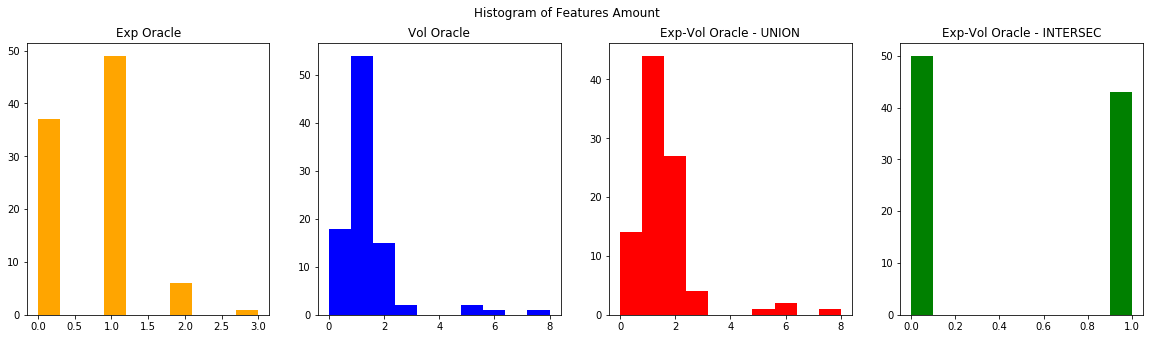

In [6]:
f2, (ax4,ax5,ax6,ax7) = plt.subplots(1, 4, figsize=(20,5))

f2.suptitle(t='Histogram of Features Amount')

ax4.set_title('Exp Oracle')
ax4.hist(feats_amount_expert, color='orange')

ax5.set_title('Vol Oracle')
ax5.hist(feats_amount_vol, color='blue')

ax6.set_title('Exp-Vol Oracle - UNION')
ax6.hist(feats_amount_exp_vol_union, color='red')

ax7.set_title('Exp-Vol Oracle - INTERSEC')
ax7.hist(feats_amount_exp_vol_intersec, color='green')

# Analysis of No Matching Answers

In [8]:
print(br_2_feature_matrix_final[(br_2_feature_matrix_final.Features_IDs_exp_m != br_2_feature_matrix_final.Features_IDs_vol_m) &
                                (br_2_feature_matrix_final.Features_IDs_exp_vol_intersec_m == "")].shape)

no_matching_answers = br_2_feature_matrix_final[(br_2_feature_matrix_final.Features_IDs_exp_m != br_2_feature_matrix_final.Features_IDs_vol_m) &
                          (br_2_feature_matrix_final.Features_IDs_exp_vol_intersec_m == "")][['Features_IDs_exp_m','Features_IDs_vol_m']]

(36, 4)


In [9]:
bugreports.head()

,Bug_Number,Summary,Platform,Component,Version,Creation_Time,Whiteboard,QA_Whiteboard,First_Comment_Text,First_Comment_Creation_Time,Status,Product,Priority,Resolution,Severity,Is_Confirmed,br_name,br_desc
0,1181835,Provide a UI for migrating users' add-ons to w...,Unspecified,Extension Compatibility,49 Branch,2015-07-08T23:01:45Z,[UX] triaged,NaN,We're still not exactly sure how this would wo...,2015-07-08T23:01:45Z,RESOLVED,Firefox,P2,FIXED,normal,True,BR_1181835_SRC,1181835 Provide a UI for migrating users' add-...
1,1248267,"Right click on bookmark item of ""Recently Book...",Unspecified,Bookmarks & History,48 Branch,2016-02-14T17:45:54Z,NaN,NaN,Steps To Reproduce: 1. Open Bookmarks menu 2. ...,2016-02-14T17:45:54Z,VERIFIED,Firefox,P3,FIXED,normal,True,BR_1248267_SRC,"1248267 Right click on bookmark item of ""Recen..."
2,1248268,"Unable to disable ""Recently bookmarked""",All,Bookmarks & History,48 Branch,2016-02-14T17:54:44Z,NaN,NaN,Created attachment 8719295 Firefox Nightly 47_...,2016-02-14T17:54:44Z,VERIFIED,Firefox,P3,FIXED,major,True,BR_1248268_SRC,"1248268 Unable to disable ""Recently bookmarked..."
3,1257087,Middle mouse click on history item would not open,Unspecified,Bookmarks & History,48 Branch,2016-03-16T05:13:47Z,NaN,NaN,[Tracking Requested - why for this release]: r...,2016-03-16T05:13:47Z,VERIFIED,Firefox,P2,FIXED,normal,True,BR_1257087_SRC,1257087 Middle mouse click on history item wou...
4,1264988,Scrollbar appears for a moment in the new Awes...,All,Address Bar,48 Branch,2016-04-15T15:17:33Z,[fxsearch] [photon-performance],NaN,Created attachment 8741829 Bug.mov User Agent...,2016-04-15T15:17:33Z,VERIFIED,Firefox,P1,FIXED,normal,True,BR_1264988_SRC,1264988 Scrollbar appears for a moment in the ...


In [16]:
features.head(22)

,Feature_Number,Feature_Shortname,Firefox_Version,Firefox_Feature,Feature_Description,Reference,feat_name,feat_desc
0,1,new_awesome_bar,48 Branch + 50 Branch,New Awesome Bar,The Firefox address bar displays a page's web ...,https://support.mozilla.org/en-US/kb/awesome-b...,new_awesome_bar,1 new_awesome_bar 48 Branch + 50 Branch New Aw...
1,2,windows_child_mode,48 Branch,Windows Child Mode,Child mode is a feature of Windows that allows...,https://wiki.mozilla.org/QA/Windows_Child_Mode,windows_child_mode,2 windows_child_mode 48 Branch Windows Child M...
2,3,apz_async_scrolling,48 Branch,APZ - Async Scrolling,The Async Pan/Zoom module (APZ) is a platform ...,https://wiki.mozilla.org/Platform/GFX/APZ,apz_async_scrolling,3 apz_async_scrolling 48 Branch APZ - Async Sc...
3,4,browser_customization,49 Branch,Browser Customization,. Install and Customize Firefox Themes. \n. Cu...,https://support.mozilla.org/en-US/kb/use-theme...,browser_customization,4 browser_customization 49 Branch Browser Cust...
4,5,pdf_viewer,49 Branch,PDF Viewer,"Zoom in, Zoom out, Print and Save PDF Files.",https://support.mozilla.org/en-US/kb/view-pdf-...,pdf_viewer,"5 pdf_viewer 49 Branch PDF Viewer Zoom in, Zoo..."
5,6,context_menu,49 Branch,Context Menu,The Context Menu is the menu that appears when...,https://www.paessler.com/manuals/paessler_site...,context_menu,6 context_menu 49 Branch Context Menu The Cont...
6,7,w10_comp,49 Branch,Windows 10 Compatibility,". Users can browse through different sites, \n...",https://support.mozilla.org/en-US/kb/how-downl...,w10_comp,7 w10_comp 49 Branch Windows 10 Compatibility ...
7,8,tts_in_desktop,49 Branch,Text to Speech on Desktop,Extension of Firefox to read out loud the HTML...,https://addons.mozilla.org/en-US/firefox/addon...,tts_in_desktop,8 tts_in_desktop 49 Branch Text to Speech on D...
8,9,tts_in_rm,49 Branch,Text to Speech in Reader Mode,Extension of Firefox to read out loud the cont...,https://support.mozilla.org/en-US/kb/firefox-r...,tts_in_rm,9 tts_in_rm 49 Branch Text to Speech in Reader...
9,10,webgl_comp,49 Branch,WebGL Compatibility,Feature of Firefox implemted based on WebGL li...,https://pt.wikipedia.org/wiki/WebGL,webgl_comp,10 webgl_comp 49 Branch WebGL Compatibility Fe...


In [11]:
no_matching_answers.head()

,Features_IDs_exp_m,Features_IDs_vol_m
Bug_Number,,
1248267,,4
1267480,3,
1269348,3,
1271607,1,4
1277937,,18 20


In [12]:
no_matching_answers.reset_index(inplace=True)

In [13]:
no_matching_answers['f_names_exp'] = no_matching_answers.Features_IDs_exp_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row if f_id != ""])
no_matching_answers['f_names_vol'] = no_matching_answers.Features_IDs_vol_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row if f_id != "" and f_id != " "])
no_matching_answers['bug_title'] = no_matching_answers.apply(lambda row : bugreports[bugreports.Bug_Number == int(row.Bug_Number)].Summary.values[0], axis=1)
no_matching_answers

,Bug_Number,Features_IDs_exp_m,Features_IDs_vol_m,f_names_exp,f_names_vol,bug_title
0,1248267,,4,[],[[browser_customization]],"Right click on bookmark item of ""Recently Book..."
1,1267480,3,,[[apz_async_scrolling]],[],Intermittent browser/components/preferences/in...
2,1269348,3,,[[apz_async_scrolling]],[],Show last sync date tooltip on Synced Tabs sid...
3,1271607,1,4,[[new_awesome_bar]],[[browser_customization]],The new window's size is modified if the last ...
4,1277937,,18 20,[],"[[new_awesome_bar], [tts_in_desktop], [windows...",https has an underline instead of a strikethro...
5,1278388,1,4 7,[[new_awesome_bar]],"[[browser_customization], [w10_comp]]",Permafailing on the change to firefox50: brows...
6,1287384,,3,[],[[apz_async_scrolling]],Incorrect alignment of Summary section in Down...
7,1287687,4,3,[[browser_customization]],[[apz_async_scrolling]],Syncs happen every 90 seconds when stale devic...
8,1287823,1,4,[[new_awesome_bar]],[[browser_customization]],[Linux] Dragging & dropping a download from th...
9,1289832,1,18,[[new_awesome_bar]],"[[new_awesome_bar], [tts_in_desktop]]",Open Link in New *Current Container* missing f...
